### Import required libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 ### Read the dataset to python environment

In [34]:
df=pd.read_csv('/content/credit.csv')

In [35]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


## PRE - PROCESSING

### Check basic information about the dataset

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [37]:
df.shape

(100000, 28)

In [38]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [39]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


##EDA(Exploratory Data Analysis)

###Univariate Plots

####Histogram

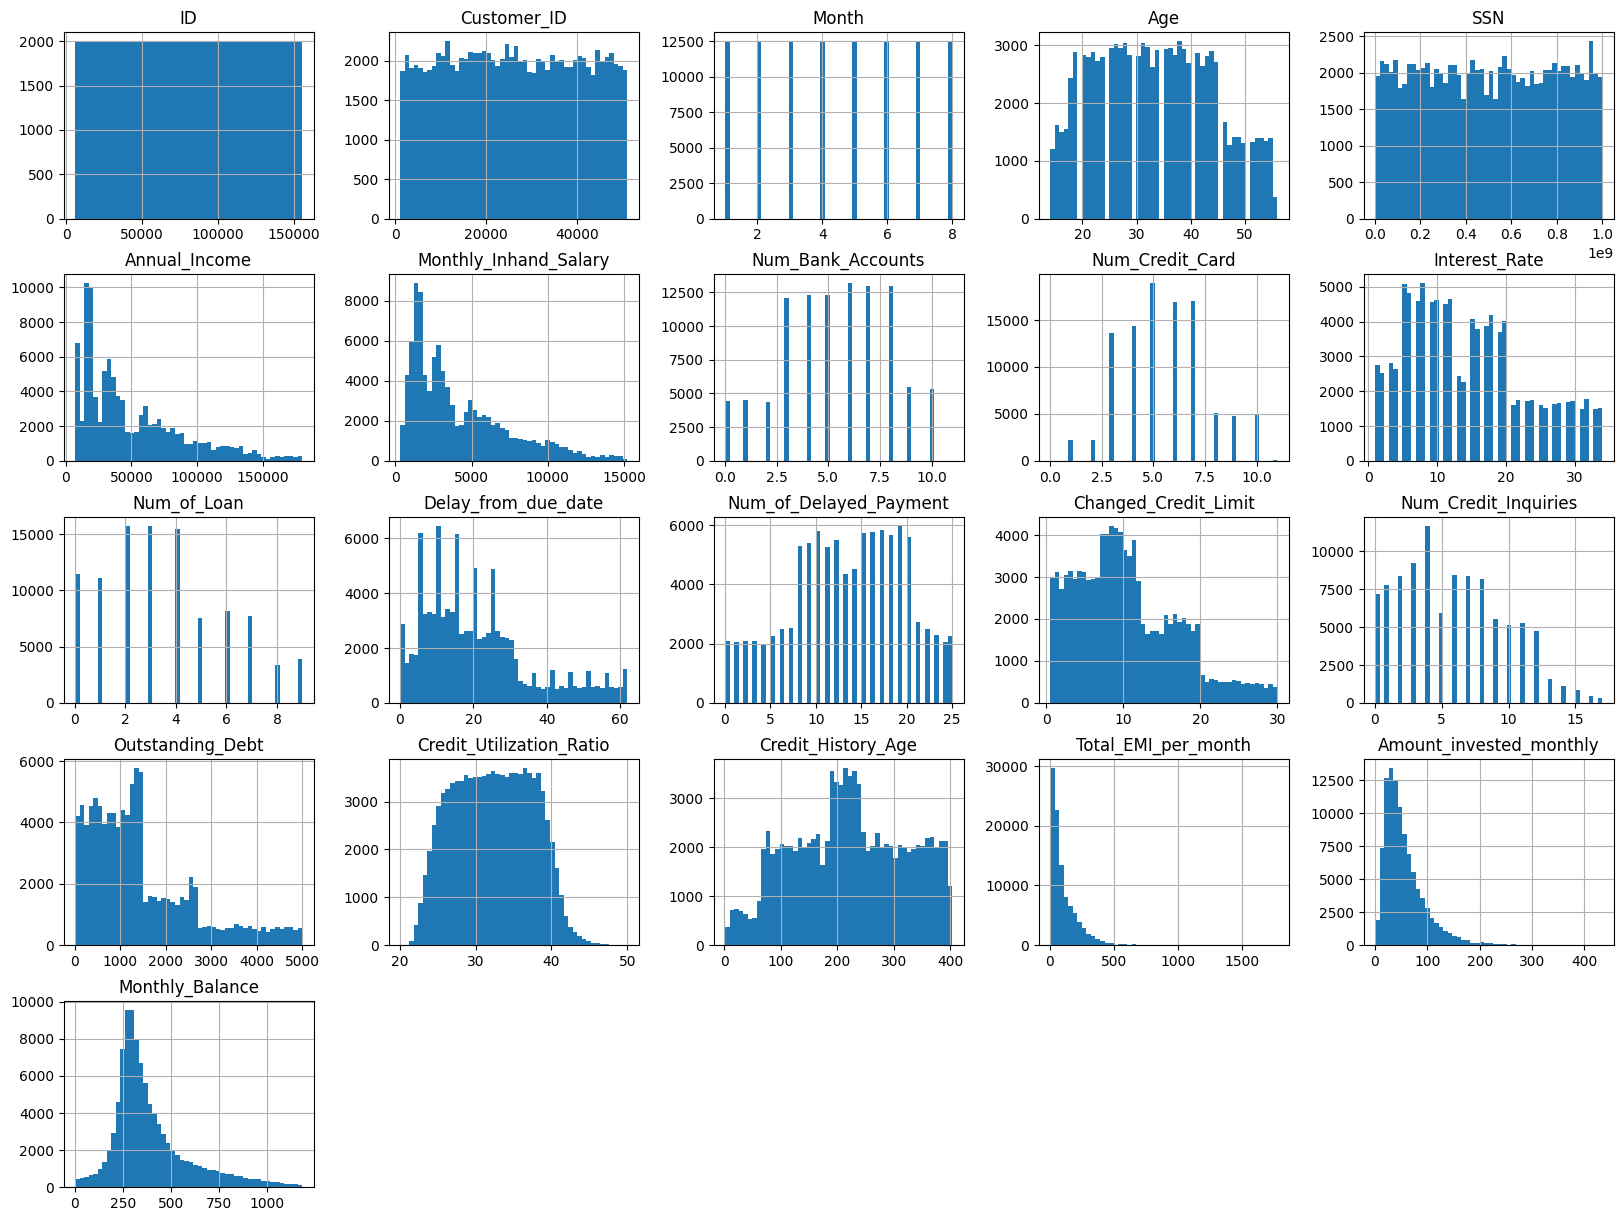

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(bins=50,figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

####Bar Plot

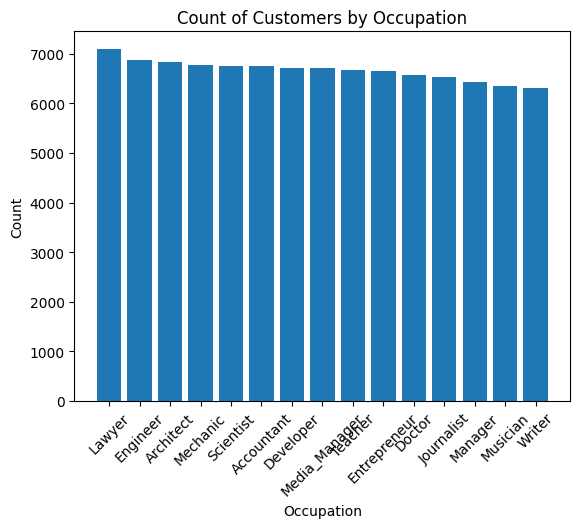

In [41]:
occupation_counts = df['Occupation'].value_counts()
plt.bar(occupation_counts.index, occupation_counts.values)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of Customers by Occupation')
plt.xticks(rotation=45)
plt.show()


###Count Plot

<ipython-input-42-a8d74af833f8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Month'],palette = "muted");


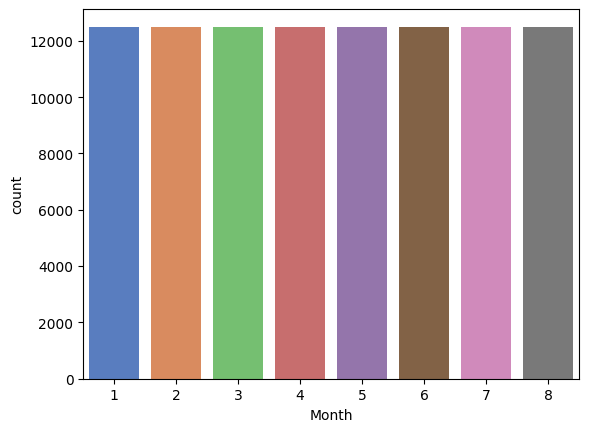

In [42]:
sns.countplot(x = df['Month'],palette = "muted");

<ipython-input-43-ef5eff421637>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Occupation'],palette = "muted");


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Scientist'),
  Text(1, 0, 'Teacher'),
  Text(2, 0, 'Engineer'),
  Text(3, 0, 'Entrepreneur'),
  Text(4, 0, 'Developer'),
  Text(5, 0, 'Lawyer'),
  Text(6, 0, 'Media_Manager'),
  Text(7, 0, 'Doctor'),
  Text(8, 0, 'Journalist'),
  Text(9, 0, 'Manager'),
  Text(10, 0, 'Accountant'),
  Text(11, 0, 'Musician'),
  Text(12, 0, 'Mechanic'),
  Text(13, 0, 'Writer'),
  Text(14, 0, 'Architect')])

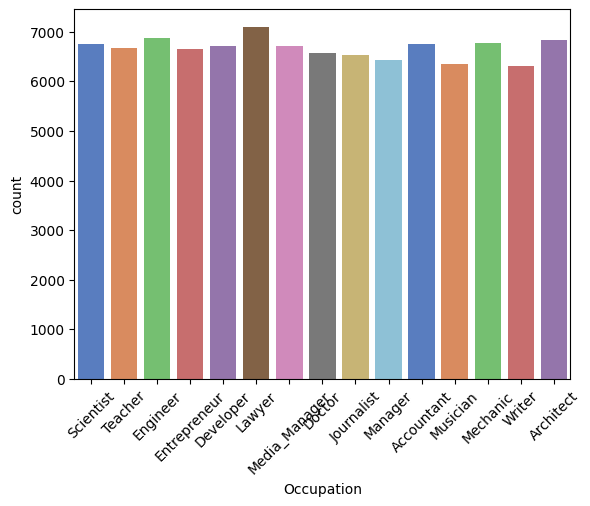

In [43]:
sns.countplot(x = df['Occupation'],palette = "muted");
plt.xticks(rotation = 45)

<ipython-input-44-fc403da8b1aa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Credit_Mix'],palette = "Set2");


([0, 1, 2], [Text(0, 0, 'Good'), Text(1, 0, 'Standard'), Text(2, 0, 'Bad')])

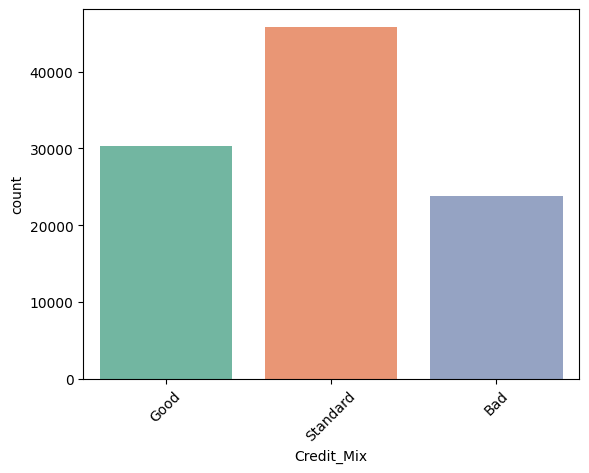

In [44]:
sns.countplot(x = df['Credit_Mix'],palette = "Set2");
plt.xticks(rotation = 45)

###Bivariate Plots

###Scatter Plot

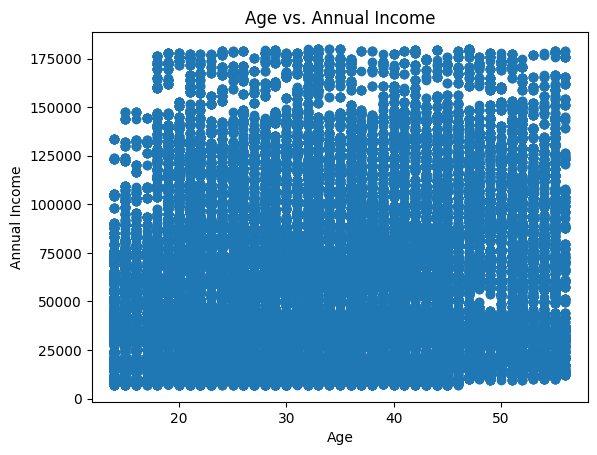

In [45]:
plt.scatter(df['Age'], df['Annual_Income'])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age vs. Annual Income')
plt.show()


###Box Plot

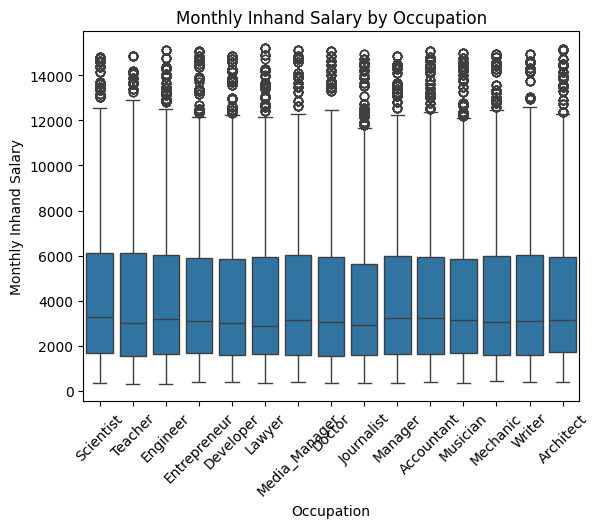

In [46]:
sns.boxplot(x='Occupation', y='Monthly_Inhand_Salary', data=df)
plt.xlabel('Occupation')
plt.ylabel('Monthly Inhand Salary')
plt.title('Monthly Inhand Salary by Occupation')
plt.xticks(rotation=45)
plt.show()

###Multivariate Plots

###Heatmap

Shows the correlation between numerical variables using color intensity. It helps identify which variables are most closely related to each other.

In [47]:
df.select_dtypes('float').corr()

,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.000000,-0.008411,0.091525,0.090636,-0.190415,-0.148567,-0.217557,-0.213533,-0.174119,-0.184264,-0.157254,-0.250960,-0.202374,0.025492,0.234618,-0.047334,0.071045,0.116098
SSN,-0.008411,1.000000,-0.008042,-0.008367,0.011651,-0.004961,0.004774,-0.010805,0.010697,0.013787,0.019752,-0.006684,0.002951,0.002653,-0.003572,-0.004696,-0.002952,-0.002724
Annual_Income,0.091525,-0.008042,1.000000,0.998154,-0.284060,-0.217852,-0.302352,-0.255560,-0.250105,-0.286297,-0.176353,-0.280242,-0.269319,0.175930,0.272374,0.438106,0.806281,0.625640
Monthly_Inhand_Salary,0.090636,-0.008367,0.998154,1.000000,-0.283181,-0.216847,-0.301858,-0.254298,-0.249438,-0.285360,-0.176187,-0.279736,-0.269044,0.176092,0.271457,0.421836,0.807326,0.626631
Num_Bank_Accounts,-0.190415,0.011651,-0.284060,-0.283181,1.000000,0.442694,0.584302,0.472483,0.560193,0.601842,0.333794,0.518323,0.507063,-0.071783,-0.485331,0.050035,-0.227828,-0.286709
Num_Credit_Card,-0.148567,-0.004961,-0.217852,-0.216847,0.442694,1.000000,0.497912,0.417960,0.479762,0.423300,0.255495,0.459429,0.490376,-0.055249,-0.417205,0.058853,-0.174600,-0.231913
Interest_Rate,-0.217557,0.004774,-0.302352,-0.301858,0.584302,0.497912,1.000000,0.559156,0.589185,0.571457,0.370156,0.632562,0.629414,-0.075700,-0.576230,0.071651,-0.242479,-0.317919
Num_of_Loan,-0.213533,-0.010805,-0.255560,-0.254298,0.472483,0.417960,0.559156,1.000000,0.501599,0.473919,0.374602,0.565087,0.638713,-0.100469,-0.605727,0.328485,-0.214254,-0.429416
Delay_from_due_date,-0.174119,0.010697,-0.250105,-0.249438,0.560193,0.479762,0.589185,0.501599,1.000000,0.541627,0.296571,0.539919,0.572206,-0.063823,-0.491484,0.078820,-0.201737,-0.272273
Num_of_Delayed_Payment,-0.184264,0.013787,-0.286297,-0.285360,0.601842,0.423300,0.571457,0.473919,0.541627,1.000000,0.329311,0.499689,0.504019,-0.073774,-0.481965,0.053653,-0.228459,-0.286045


<Axes: >

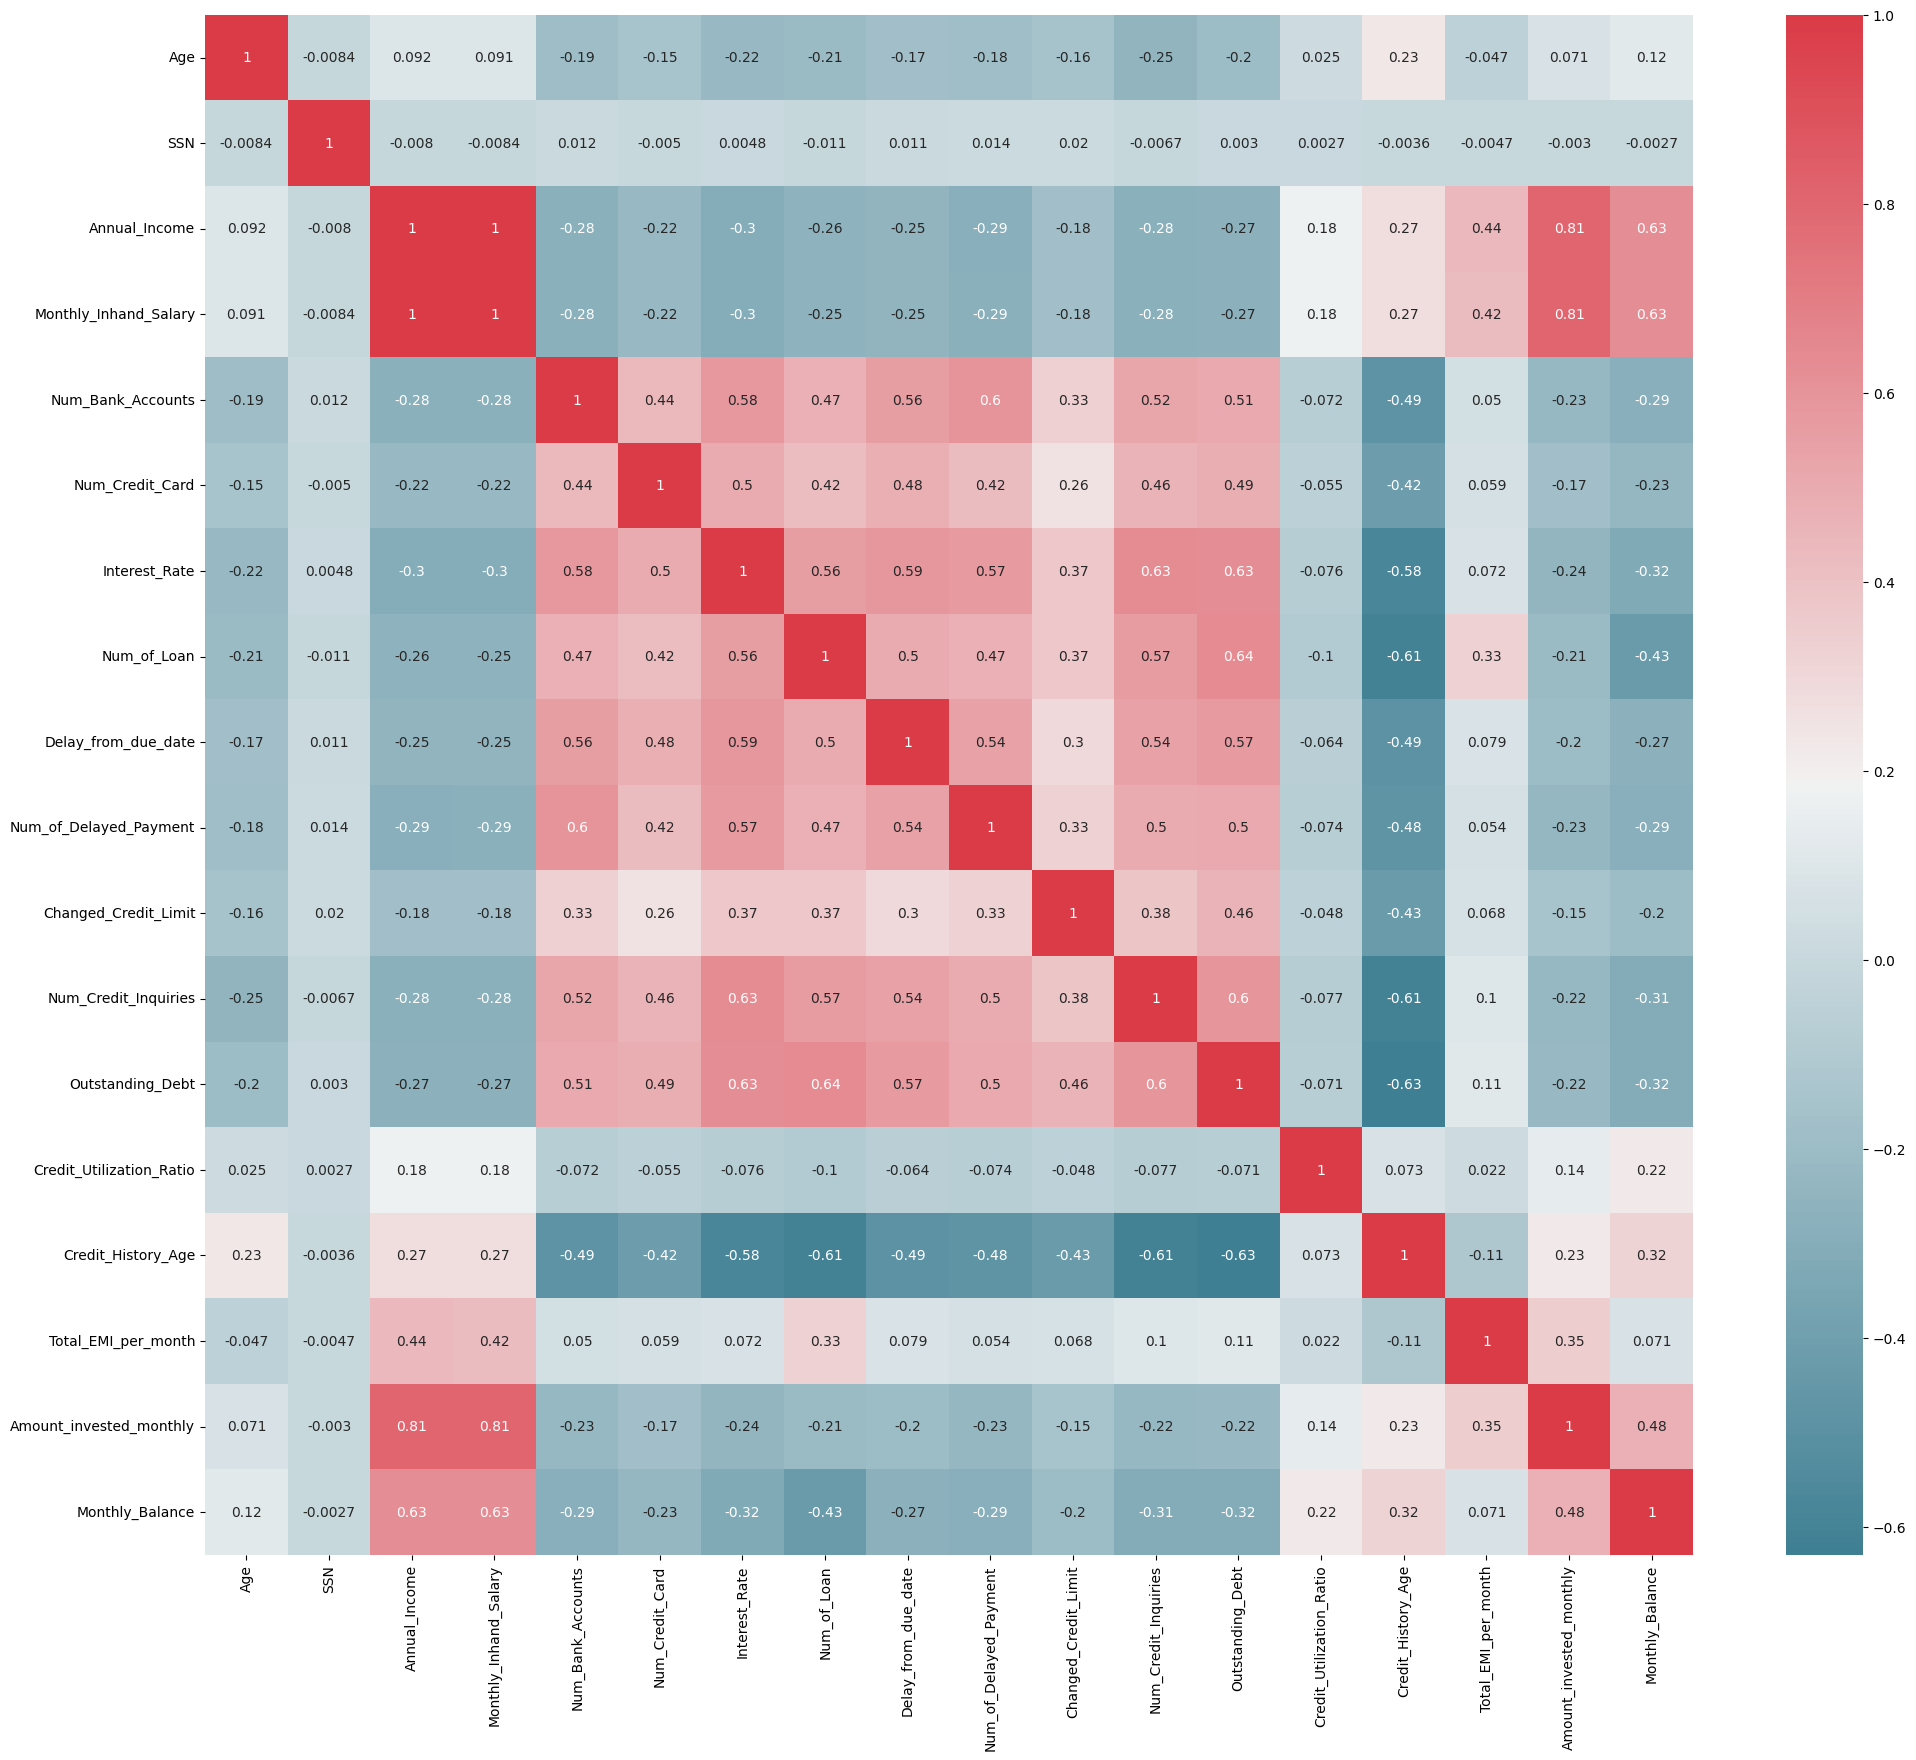

In [48]:
import seaborn as sns
plt.figure(figsize=(24,20))
cmap = sns.diverging_palette(220, 10, center='light', as_cmap=True)
sns.heatmap(data = df.select_dtypes('float').corr(),annot=True,cmap=cmap)

From the correlation Map we can observe that there is high correlation between Monthly_Inhand_Salary and Annual_Income. So we can drop any one of them. Here Iam dropping Monthly_Inhand_Salary.Also ID, Name, SSN ,month,customer id,age,Occupation are not useful.So we can drop those columns.

In [49]:
del df['ID']
del df['Name']
del df['SSN']
del df['Occupation']
del df['Month']
del df['Customer_ID']
del df['Age']
del df['Monthly_Inhand_Salary']

###Distribution Of Credit_Score Feature

In [50]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

##Null Value Imputation

In [51]:
df.isnull().sum().sort_values(ascending=False)

Annual_Income               0
Num_Bank_Accounts           0
Monthly_Balance             0
Payment_Behaviour           0
Amount_invested_monthly     0
Total_EMI_per_month         0
Payment_of_Min_Amount       0
Credit_History_Age          0
Credit_Utilization_Ratio    0
Outstanding_Debt            0
Credit_Mix                  0
Num_Credit_Inquiries        0
Changed_Credit_Limit        0
Num_of_Delayed_Payment      0
Delay_from_due_date         0
Type_of_Loan                0
Num_of_Loan                 0
Interest_Rate               0
Num_Credit_Card             0
Credit_Score                0
dtype: int64

No Null values present.

##Outlier Detection

### Boxplot for checking outliers

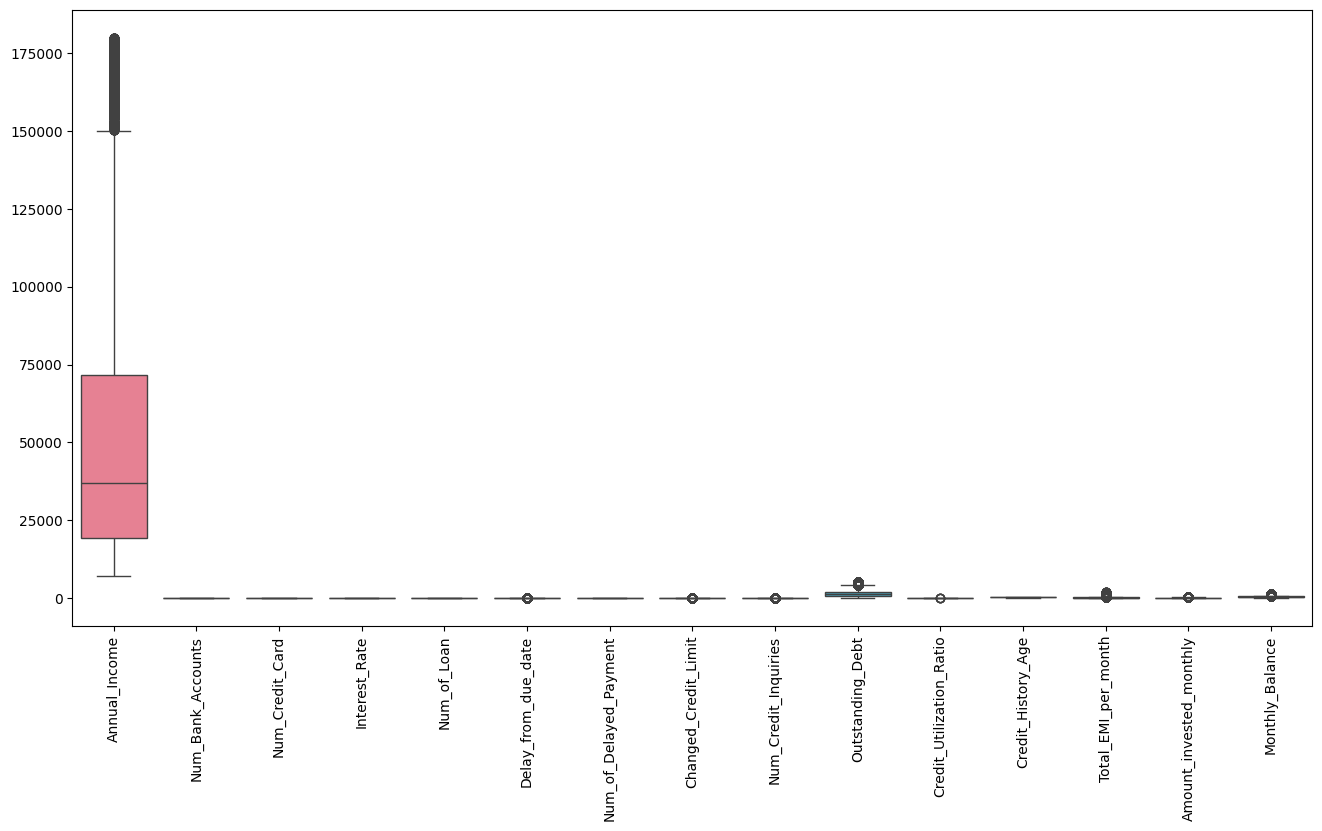

In [52]:
plt.figure(figsize=(16,8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [53]:
for i in ['Annual_Income',
       'Delay_from_due_date', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio','Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']:
    print('Skewness value of column', i, 'is', df[i].skew())

Skewness value of column Annual_Income is 1.130222566741384
Skewness value of column Delay_from_due_date is 0.9698402706723249
Skewness value of column Changed_Credit_Limit is 0.7083424268261724
Skewness value of column Num_Credit_Inquiries is 0.40682536214725384
Skewness value of column Outstanding_Debt is 1.2075361955699684
Skewness value of column Credit_Utilization_Ratio is 0.02861652613497035
Skewness value of column Total_EMI_per_month is 4.041492244076896
Skewness value of column Amount_invested_monthly is 1.7610362306626115
Skewness value of column Monthly_Balance is 1.3556137797479813


All are skewed distributions. So use IQR (Inter Quartile Range) method for outlier detection.

### IQR method for outlier detection and clip function for outlier handling

In [54]:
for i in ['Annual_Income',
       'Delay_from_due_date', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio','Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']:
    Q1=np.percentile(df[i],25,method='midpoint')
    Q3=np.percentile(df[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in df[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)
    df[i]=df[i].clip(lower=low_lim,upper=up_lim)

### Check again for outliers using boxplot

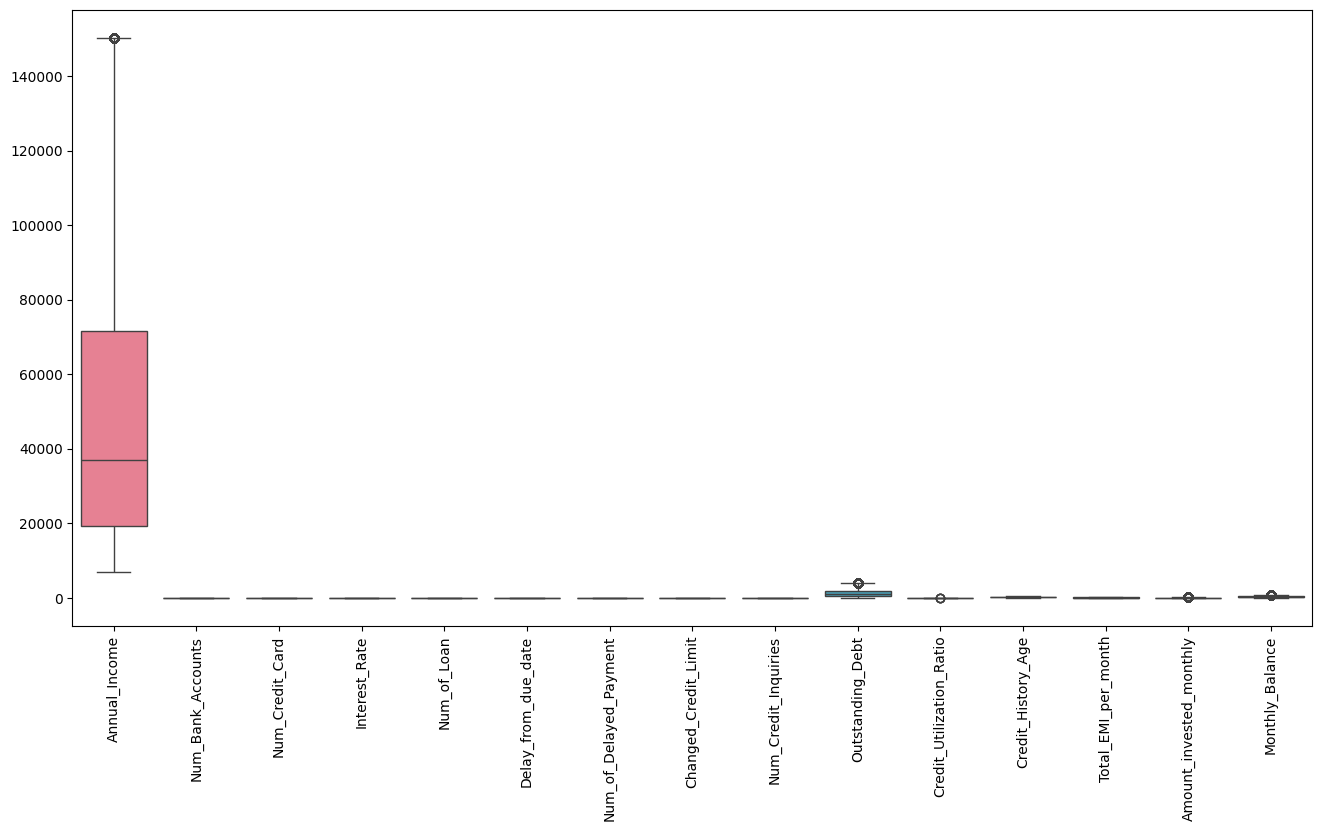

In [55]:
plt.figure(figsize=(16,8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

Outliers are removed

In [57]:
df['Payment_of_Min_Amount'].replace("NM","No",inplace = True)

### Label encoding

Label encoding is a technique used in machine learning to convert categorical data into numerical form.

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Credit_Score'] = le.fit_transform(df['Credit_Score'])
df['Type_of_Loan'] =le.fit_transform(df['Type_of_Loan'])
df['Credit_Mix']=le.fit_transform(df['Credit_Mix'])
df['Payment_of_Min_Amount']=le.fit_transform(df['Payment_of_Min_Amount'])
df['Payment_Behaviour']=le.fit_transform(df['Payment_Behaviour'])


In [59]:
df.head()

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,19114.12,3.0,4.0,3.0,4.0,128,3.0,7.0,11.27,4.0,1,809.98,26.822620,265.0,0,49.574949,21.46538,2,312.494089,0
1,19114.12,3.0,4.0,3.0,4.0,128,3.0,4.0,11.27,4.0,1,809.98,31.944960,266.0,0,49.574949,21.46538,3,284.629162,0
2,19114.12,3.0,4.0,3.0,4.0,128,3.0,7.0,11.27,4.0,1,809.98,28.609352,267.0,0,49.574949,21.46538,4,331.209863,0
3,19114.12,3.0,4.0,3.0,4.0,128,5.0,4.0,6.27,4.0,1,809.98,31.377862,268.0,0,49.574949,21.46538,5,223.451310,0
4,19114.12,3.0,4.0,3.0,4.0,128,6.0,4.0,11.27,4.0,1,809.98,24.797347,269.0,0,49.574949,21.46538,1,341.489231,0


##Train Test Split

In [60]:
y = df.Credit_Score
X = df.drop('Credit_Score',axis=True)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Validation Split

In [62]:
from sklearn.model_selection import train_test_split
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)